### Functions

In Python, we can define a function by using keyword def.

In [25]:
def square(x):
    return x*x

print(square(5))

25


You can apply a function to each element of a list/array by using lambda function. For example, we want to square elements in a list:

In [26]:
array = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

# apply function "square" on each element of "array"
print(list(map(lambda x: square(x), array)))

# or using a for loop, and a list comprehension
print([square(x) for x in array])

print("orignal array:", array)

[1, 4, 9, 16, 25, 36, 49, 64, 81, 100]
[1, 4, 9, 16, 25, 36, 49, 64, 81, 100]
orignal array: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


These two above syntaxes are used very often.

If you are not familiar with list comprehensions, follow this [link](http://python-3-patterns-idioms-test.readthedocs.io/en/latest/Comprehensions.html%5D).

We can also put a function B inside a function A (that is, we can have nested functions). In that case, function B is only accessed inside function A (the scope that it's declared). For example:

In [27]:
# select only the prime number in array
# and square them
def filterAndSquarePrime(arr):
    
    # a very simple function to check a number is prime or not
    def checkPrime(number):
        if (number <= 1): return False
        # if we find any divisor of "number" return false
        # we can improve this process by only finding divisors in range [2, sqrt(number)]
        for i in range(2, int(number/2) + 1):
            if number % i == 0:
                return False
        return True
    
    primeNumbers = filter(lambda x: checkPrime(x), arr)
    return map(lambda x: square(x), primeNumbers)

# we can not access checkPrime from here
# checkPrime(5)

result = filterAndSquarePrime(array)
list(result)

[4, 9, 25, 49]

### Importing modules, functions

Modules in Python are packages of code. Putting code into modules helps increasing the reusability and maintainability. The modules can be nested. To import a module, we simple use syntax: import <module_name>. Once it is imported, we can use any functions, classes inside it.

In [28]:
# import module 'math' to uses functions for calculating
import math

# print the square root of 16
print(math.sqrt(16))

# we can create alias when import a module
import numpy as np

print(np.sqrt(16))

4.0
4.0


Sometimes, you only need to import some functions inside a module to avoid loading the whole module into memory. To do that, we can use syntax: from <module> import <function>

In [29]:
# only import function 'sin' in package 'math'
from math import sin

# use the function
print(sin(60))

-0.3048106211022167


## ===> Your turn!

## Question 1

### 1.1

Write a function `checkSquareNumber` to check if a integer number is a square number or not. For example, 16 and 9 are square numbers. 15 isn't square number.
Requirements: - **Input**: an integer number - **Output**: `True` or `False`

*hint: if the square root of number x is an integer, then x is a square number*

In [30]:
import math

def checkSquareNumber(x):
    return math.sqrt(x) == int(math.sqrt(x))
    
print(checkSquareNumber(16))
print(checkSquareNumber(250))

True
False


### 1.2

A list list_numbers which contains the numbers from 1 to 9999 can be constructed from:

`list_numbers = range(0, 10000)`

Extract the square numbers in `list_numbers` using function `checkSquareNumber` from question 1.1. How many elements in the extracted list ?

In [31]:
list_numbers = range(0, 10000)
square_numbers = list(filter(checkSquareNumber, list_numbers))
print(square_numbers)
print(f"{len(square_numbers)} elements are square numbers")

[0, 1, 4, 9, 16, 25, 36, 49, 64, 81, 100, 121, 144, 169, 196, 225, 256, 289, 324, 361, 400, 441, 484, 529, 576, 625, 676, 729, 784, 841, 900, 961, 1024, 1089, 1156, 1225, 1296, 1369, 1444, 1521, 1600, 1681, 1764, 1849, 1936, 2025, 2116, 2209, 2304, 2401, 2500, 2601, 2704, 2809, 2916, 3025, 3136, 3249, 3364, 3481, 3600, 3721, 3844, 3969, 4096, 4225, 4356, 4489, 4624, 4761, 4900, 5041, 5184, 5329, 5476, 5625, 5776, 5929, 6084, 6241, 6400, 6561, 6724, 6889, 7056, 7225, 7396, 7569, 7744, 7921, 8100, 8281, 8464, 8649, 8836, 9025, 9216, 9409, 9604, 9801]
100 elements are square numbers


### 1.3

Using array slicing, select the elements of the list square_numbers, whose index is from 5 to 20 (zero-based index).

In [32]:
print(square_numbers[5:21]) # select from the 6th (because Python is 0 indexed)
                            # to the 21st element (because Python doesn't include the upper limit of a slice),
                            # I hope this is what you were asking for, I didn't fully undestand the question

[25, 36, 49, 64, 81, 100, 121, 144, 169, 196, 225, 256, 289, 324, 361, 400]


## 2.2 Numpy

Numpy is the core library for scientific computing in Python. It provides a high-performance multidimensional array object, and tools for working with these arrays.

### 2.2.1. Array
A numpy array is a grid of values, all of the same type, and is indexed by a tuple of nonnegative integers. Thanks to the same type property, Numpy has the benefits of locality of reference. Besides, many other Numpy operations are implemented in C, avoiding the general cost of loops in Python, pointer indirection and per-element dynamic type checking. So, the speed of Numpy is often faster than using built-in datastructure of Python. When working with massive data with computationally expensive tasks, you should consider to use Numpy.

The number of dimensions is the rank of the array; the shape of an array is a tuple of integers giving the size of the array along each dimension.

We can initialize numpy arrays from nested Python lists, and access elements using square brackets:

In [33]:
import numpy as np

# Create a rank 1 array
rank1_array = np.array([1, 2, 3])
print("type of rank1_array:", type(rank1_array))
print("shape of rank1_array:", rank1_array.shape)
print("elements in rank1_array:", rank1_array[0], rank1_array[1], rank1_array[2])

# Create a rank 2 array
rank2_array = np.array([[1,2,3],[4,5,6]])
print("shape of rank2_array:", rank2_array.shape)
print(rank2_array[0, 0], rank2_array[0, 1], rank2_array[1, 0])

type of rank1_array: <class 'numpy.ndarray'>
shape of rank1_array: (3,)
elements in rank1_array: 1 2 3
shape of rank2_array: (2, 3)
1 2 4


### 2.2.2. Array slicing
Similar to Python lists, numpy arrays can be sliced. The different thing is that you must specify a slice for each dimension of the array because arrays may be multidimensional.

In [34]:
import numpy as np
m_array = np.array([[1,2,3,4], [5,6,7,8], [9,10,11,12]])

print(m_array[[0,1]])

# Use slicing to pull out the subarray consisting of the first 2 rows
# and columns 1 and 2
b = m_array[:2, 1:3]
print(b)

# we can only use this syntax with numpy array, not python list
print("value at row 0, column 1:", m_array[0, 1])

# Rank 1 view of the second row of m_array  
print("the second row of m_array:", m_array[1, :])

# print element at position (0,2) and (1,3)
print(m_array[[0,1], [2,3]])

[[1 2 3 4]
 [5 6 7 8]]
[[2 3]
 [6 7]]
value at row 0, column 1: 2
the second row of m_array: [5 6 7 8]
[3 8]


### 2.2.3. Boolean array indexing
We can use boolean array indexing to check whether each element in the array satisfies a condition or use it to do filtering.

In [35]:
m_array = np.array([[1,2,3,4], [5,6,7,8], [9,10,11,12]])

# Find the elements of a that are bigger than 2
# this returns a numpy array of Booleans of the same
# shape as m_array, where each value of bool_idx tells
# whether that element of a is > 3 or not
bool_idx = (m_array > 3)
print(bool_idx , "\n")

# We use boolean array indexing to construct a rank 1 array
# consisting of the elements of a corresponding to the True values
# of bool_idx
print(m_array[bool_idx], "\n")

# We can combine two statements
print(m_array[m_array > 3], "\n")

# select elements with multiple conditions
print(m_array[(m_array > 3) & (m_array % 2 == 0)])


[[False False False  True]
 [ True  True  True  True]
 [ True  True  True  True]] 

[ 4  5  6  7  8  9 10 11 12] 

[ 4  5  6  7  8  9 10 11 12] 

[ 4  6  8 10 12]


### 2.2.4. Datatypes
Remember that the elements in a numpy array have the same type. When constructing arrays, Numpy tries to guess a datatype when you create an array However, we can specify the datatype explicitly via an optional argument.

In [36]:
# let Numpy guess the datatype
x1 = np.array([1, 2])
print(x1.dtype)

# force the datatype be float64
x2 = np.array([1, 2], dtype=np.float64)
print(x2.dtype)

int64
float64


### 2.2.5. Array math
Similar to Matlab or R, in Numpy, basic mathematical functions operate elementwise on arrays, and are available both as operator overloads and as functions in the numpy module.

In [37]:
x = np.array([[1,2],[3,4]], dtype=np.float64)
y = np.array([[5,6],[7,8]], dtype=np.float64)
# mathematical function is used as operator
print("x + y =", x + y, "\n")

# mathematical function is used as function
print("np.add(x, y)=", np.add(x, y), "\n")

# Unlike MATLAB, * is elementwise multiplication
# not matrix multiplication
print("x * y =", x * y , "\n")
print("np.multiply(x, y)=", np.multiply(x, y), "\n")
print("x*2=", x*2, "\n")

# to multiply two matrices, we use dot function
print("x.dot(y)=", x.dot(y), "\n")
print("np.dot(x, y)=", np.dot(x, y), "\n")

# Elementwise square root
print("np.sqrt(x)=", np.sqrt(x), "\n")

x + y = [[ 6.  8.]
 [10. 12.]] 

np.add(x, y)= [[ 6.  8.]
 [10. 12.]] 

x * y = [[ 5. 12.]
 [21. 32.]] 

np.multiply(x, y)= [[ 5. 12.]
 [21. 32.]] 

x*2= [[2. 4.]
 [6. 8.]] 

x.dot(y)= [[19. 22.]
 [43. 50.]] 

np.dot(x, y)= [[19. 22.]
 [43. 50.]] 

np.sqrt(x)= [[1.         1.41421356]
 [1.73205081 2.        ]] 



Note that unlike MATLAB, `*` is elementwise multiplication, not matrix multiplication. We instead use the `dot` function to compute inner products of vectors, to multiply a vector by a matrix, and to multiply matrices. In what follows, we work on a few more examples to reiterate the concept.

In [38]:
# declare two vectors
v = np.array([9,10])
w = np.array([11, 12])

# Inner product of vectors
print("v.dot(w)=", v.dot(w))
print("np.dot(v, w)=", np.dot(v, w))

# Matrix / vector product
print("x.dot(v)=", x.dot(v))
print("np.dot(x, v)=", np.dot(x, v))

# Matrix / matrix product
print("x.dot(y)=", x.dot(y))
print("np.dot(x, y)=", np.dot(x, y))

v.dot(w)= 219
np.dot(v, w)= 219
x.dot(v)= [29. 67.]
np.dot(x, v)= [29. 67.]
x.dot(y)= [[19. 22.]
 [43. 50.]]
np.dot(x, y)= [[19. 22.]
 [43. 50.]]


Additionally, we can do other aggregation computations on arrays such as `sum`, `nansum`, or `T`.

In [39]:
x = np.array([[1,2], [3,4]])

# Compute sum of all elements
print(np.sum(x))

# Compute sum of each column
print(np.sum(x, axis=0))

# Compute sum of each row
print(np.sum(x, axis=1))

# transpose the matrix
print(x.T)

# Note that taking the transpose of a rank 1 array does nothing:
v = np.array([1,2,3])
print(v.T)  # Prints "[1 2 3]"

10
[4 6]
[3 7]
[[1 3]
 [2 4]]
[1 2 3]


## ===> Your turn!

## Question 2

Given a 2D array:

```
 1  2  3  4
 5  6  7  8 
 9 10 11 12
13 14 15 16
```

### 2.1

Print the all odd numbers in this array using Boolean array indexing.

In [40]:
import numpy as np
array_numbers = np.array([
        [1, 2, 3, 4],
        [5, 6, 7, 8],
        [9, 10, 11, 12],
        [13, 14, 15, 16]
    ])

print([list(filter(lambda x: x%2!=0, arr)) for arr in array_numbers])

[[1, 3], [5, 7], [9, 11], [13, 15]]


### 2.2

Extract the second row and the third column in this array using array slicing.

In [41]:
print(array_numbers[1])
print(array_numbers[:, 2])

[5 6 7 8]
[ 3  7 11 15]


### 2.3
Calculate the sum of diagonal elements.

In [42]:
print(sum([array_numbers[i,i] for i in range(len(array_numbers))]))

34


### 2.4
Print elementwise multiplication of the first row and the last row using numpy's functions. Print the inner product of these two rows.

In [43]:
print(np.multiply(array_numbers[0], array_numbers[-1]))
print(np.dot(array_numbers[0], array_numbers[-1]))

[13 28 45 64]
150


## 2.3 Matplotlib

As its name indicates, Matplotlib is a plotting library. It provides both a very quick way to visualize data from Python and publication-quality figures in many formats. The most important function in matplotlib is plot, which allows you to plot 2D data.

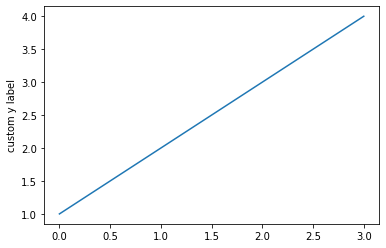

In [44]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot([1,2,3,4])
plt.ylabel('custom y label')
plt.show()

In this case, we provide a single list or array to the plot() command, matplotlib assumes it is a sequence of y values, and automatically generates the x values for us. Since python ranges start with 0, the default x vector has the same length as y but starts with 0. Hence the x data are [0,1,2,3].

In the next example, we plot figure with both x and y data. Besides, we want to draw dashed lines instead of the solid in default.

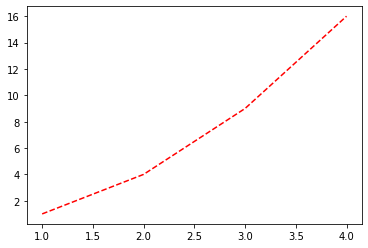

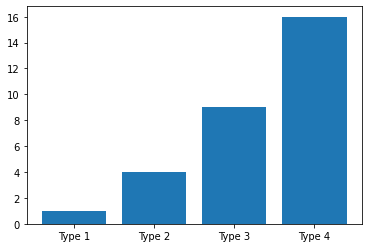

In [45]:
plt.plot([1, 2, 3, 4], [1, 4, 9, 16], 'r--')
plt.show()

plt.bar([1, 2, 3, 4], [1, 4, 9, 16], align='center')
# labels of each column bar
x_labels = ["Type 1", "Type 2", "Type 3", "Type 4"]
# assign labels to the plot
plt.xticks([1, 2, 3, 4], x_labels)

plt.show()

If we want to merge two figures into a single one, subplot is the best way to do that. For example, we want to put two figures in a stack vertically, we should define a grid of plots with 2 rows and 1 column. Then, in each row, a single figure is plotted.

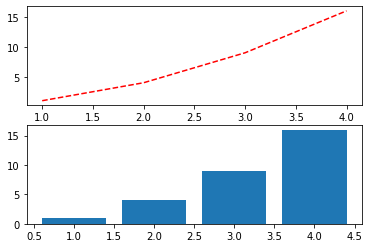

In [46]:
# Set up a subplot grid that has height 2 and width 1,
# and set the first such subplot as active.
plt.subplot(2, 1, 1)
plt.plot([1, 2, 3, 4], [1, 4, 9, 16], 'r--')

# Set the second subplot as active, and make the second plot.
plt.subplot(2, 1, 2)
plt.bar([1, 2, 3, 4], [1, 4, 9, 16])

plt.show()

For more examples, please visit the [homepage](http://matplotlib.org/1.5.1/examples/index.html) of Matplotlib.

## ==> Your turn

## Question 3

Given a list of numbers from 0 to 9999.

### Question 3.1

Calculate the histogram of numbers divisible by 3, 7, 11 in the list respectively.
( Or in other word, how many numbers divisible by 3, 7, 11 in the list respectively ?


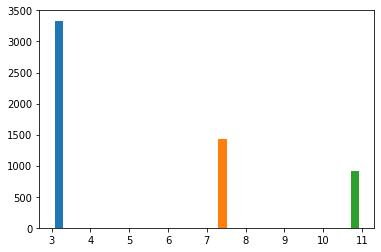

In [53]:
def divisor(x, y):
    return x % y == 0


arr = np.array(range(0,10000))
divisors = [[y for x in arr if divisor(x, y)] for y in [3,7,11]]
histogram = plt.hist(divisors)
# print(histogram)
plt.show()

### Question 3.2
Plot the histogram in a line chart.

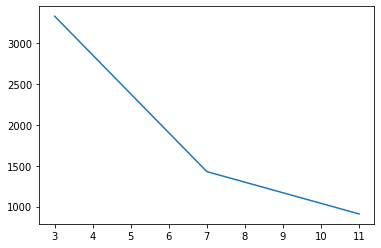

In [48]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot([3,7,11], [len(d) for d in divisors])


### Question 3.3
Plot the histogram in a bar chart.

<BarContainer object of 3 artists>

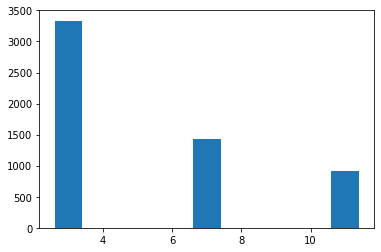

In [49]:
plt.bar([3,7,11], [len(d) for d in divisors])
